In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
global_temp_country = pd.read_csv(r'data\GlobalLandTemperaturesByCountry.csv')

In [3]:
global_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [4]:
global_temp_country.shape

(577462, 4)

In [ ]:
global_temp_country.isna().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [6]:
global_temp_country.dropna(how='any', subset='AverageTemperature', inplace=True)

In [ ]:
global_temp_country.Country.unique() #duplicates detected

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt'

In [8]:
dict = {'Denmark (Europe)':'Denmark',
        'France (Europe)':'France',
        'Netherlands (Europe)':'Netherlands',
        'United Kingdom (Europe)':'United Kingdom'}

In [9]:
global_temp_country['Country'] = global_temp_country.Country.replace(dict)

In [10]:
# mean temp by country

In [11]:
temp_mean = global_temp_country.groupby('Country')['AverageTemperature'].mean().sort_values(ascending=False).reset_index()

In [12]:
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

In [13]:
fig = px.choropleth(temp_mean, locations='Country', locationmode='country names', color='AverageTemperature')
fig.update_layout(title='Map of Mean Temperatures')
fig.show()

In [14]:
# sort countries by the mean temperature and plot it

In [15]:
temp_mean

,Country,AverageTemperature
0,Djibouti,28.816603
1,Mali,28.441977
2,Burkina Faso,28.083507
3,Senegal,27.967375
4,Aruba,27.920390
...,...,...
233,Denmark,-3.026503
234,Canada,-5.216659
235,Russia,-5.521882
236,Svalbard And Jan Mayen,-7.448028


<Axes: xlabel='AverageTemperature', ylabel='Country'>

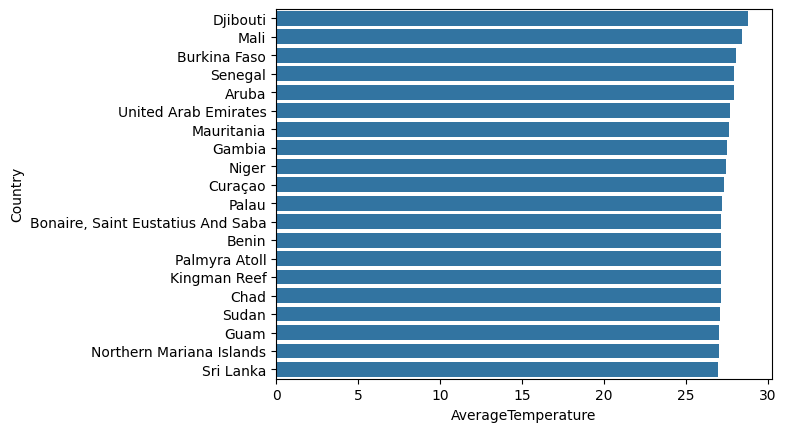

In [16]:
sns.barplot(data=temp_mean[0:20], x='AverageTemperature', y='Country')

In [17]:
# is there any global warming?

In [19]:
global_temp = pd.read_csv(r'data\GlobalTemperatures.csv')

In [20]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
global_temp.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [22]:
global_temp.shape

(3192, 9)

In [23]:
global_temp.dt[0].split('-')[0]

'1750'

In [24]:
def fetchYear(date):
    return date.split('-')[0]

In [25]:
global_temp['year'] = global_temp.dt.apply(fetchYear)

In [26]:
global_temp.groupby('year').agg({'LandAverageTemperature' : 'mean', 'LandAverageTemperatureUncertainty' : 'mean'})

,LandAverageTemperature,LandAverageTemperatureUncertainty
year,,
1750,8.719364,2.637818
1751,7.976143,2.781143
1752,5.779833,2.977000
1753,8.388083,3.176000
1754,8.469333,3.494250
...,...,...
2011,9.516000,0.082000
2012,9.507333,0.083417
2013,9.606500,0.097667


In [27]:
data = global_temp.groupby('year').agg({'LandAverageTemperature' : 'mean', 'LandAverageTemperatureUncertainty' : 'mean'}).reset_index()

In [28]:
data['UncertaintyTop'] = data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['UncertaintyBottom'] = data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']

In [29]:
data.head()

,year,LandAverageTemperature,LandAverageTemperatureUncertainty,UncertaintyTop,UncertaintyBottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [30]:
fig = px.line(data, x='year', y=['UncertaintyTop', 'UncertaintyBottom', 'LandAverageTemperature'])
fig.show()

In [31]:
# analyse average temperature each season

In [32]:
global_temp['dt'] = pd.to_datetime(global_temp.dt)

In [33]:
global_temp['month'] = global_temp.dt.dt.month

In [34]:
global_temp.drop('dt', axis=1, inplace=True)

In [35]:
global_temp.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month
0,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5


In [36]:
def get_season(month):
    if month >= 3 and month <= 5: return 'spring'
    elif month >= 6 and month <= 8: return 'summer'
    elif month >= 9 and month <= 11: return 'autumn'
    else: return 'winter'

In [37]:
global_temp['season'] = global_temp.month.apply(get_season)

In [38]:
years = global_temp.year.unique()

In [39]:
summer_temps, autumn_temps, winter_temps, spring_temps = [] , [], [], []

for year in years:
    current_year_df = global_temp[global_temp.year == year]
    summer_temps.append(current_year_df[current_year_df.season == 'summer'].LandAverageTemperature.mean())
    autumn_temps.append(current_year_df[current_year_df.season == 'autumn'].LandAverageTemperature.mean())
    winter_temps.append(current_year_df[current_year_df.season == 'winter'].LandAverageTemperature.mean())
    spring_temps.append(current_year_df[current_year_df.season == 'spring'].LandAverageTemperature.mean())

In [40]:
season = pd.DataFrame()
season['year'] = years
season['summer_temps'] = summer_temps
season['winter_temps'] = winter_temps
season['autumn_temps'] = autumn_temps
season['spring_temps'] = spring_temps

In [41]:
season

,year,summer_temps,winter_temps,autumn_temps,spring_temps
0,1750,14.518333,2.963000,8.890000,8.563000
1,1751,14.116000,1.729000,10.673000,6.735000
2,1752,NaN,2.717000,7.587000,7.035500
3,1753,14.608333,1.104333,9.212333,8.627333
4,1754,14.208333,1.637333,8.957333,9.074333
...,...,...,...,...,...
261,2011,14.954667,3.893333,10.026000,9.190000
262,2012,14.762667,3.629000,10.208000,9.429667
263,2013,14.771000,4.210333,10.278000,9.166667
264,2014,14.694333,4.027333,10.044667,9.516333


In [42]:
fig = px.line(season, x='year', y=['summer_temps', 'winter_temps', 'autumn_temps', 'spring_temps'])
fig.show()

In [43]:
# analyse trends in temperatures for top countries

In [44]:
continent = ['Russia', 'United States', 'China', 'Japan', 'Australia', 'India']

In [45]:
global_temp_country

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
...,...,...,...,...
577456,2013-04-01,21.142,0.495,Zimbabwe
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe


In [46]:
continent_df = global_temp_country[global_temp_country.Country.isin(continent)]

In [47]:
continent_df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
34816,1852-07-01,14.116,1.530,Australia
34817,1852-08-01,15.330,1.400,Australia
34818,1852-09-01,18.740,1.446,Australia
34819,1852-10-01,21.984,1.493,Australia
34820,1852-11-01,24.073,1.466,Australia
...,...,...,...,...
557816,2013-05-01,14.073,0.178,United States
557817,2013-06-01,20.198,0.236,United States
557818,2013-07-01,22.074,0.152,United States
557819,2013-08-01,21.168,0.249,United States


In [48]:
continent_df['year'] = continent_df.dt.apply(fetchYear)

In [49]:
continent_df.groupby(['year', 'Country']).agg({'AverageTemperature':'mean'})

AverageTemperature
year Country                          
1768 United States            5.572750
1769 United States           10.446500
1774 United States            1.603000
1775 United States            9.499167
1776 United States            8.110000
...                                ...
2013 China                    9.295000
     India                   25.413250
     Japan                   12.964750
     Russia                  -2.263125
     United States           11.297111

[1148 rows x 1 columns]

In [50]:
mean_temp = continent_df.groupby(['year', 'Country']).agg({'AverageTemperature':'mean'}).reset_index()
mean_temp.head()

,year,Country,AverageTemperature
0,1768,United States,5.572750
1,1769,United States,10.446500
2,1774,United States,1.603000
3,1775,United States,9.499167
4,1776,United States,8.110000


In [51]:
fig = px.line(mean_temp, x='year', y='AverageTemperature', color='Country')
fig.show()

In [52]:
# USA map for state temperatures

In [54]:
temp_state = pd.read_csv(r'data\GlobalLandTemperaturesByState.csv')
temp_state.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [55]:
usa_temp = temp_state[temp_state.Country == 'United States']
usa_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
7458,1743-11-01,10.722,2.898,Alabama,United States
7459,1743-12-01,NaN,NaN,Alabama,United States
7460,1744-01-01,NaN,NaN,Alabama,United States
7461,1744-02-01,NaN,NaN,Alabama,United States
7462,1744-03-01,NaN,NaN,Alabama,United States


In [56]:
usa_temp.shape

(149745, 5)

In [57]:
usa_temp.isna().sum()

dt                                  0
AverageTemperature               7815
AverageTemperatureUncertainty    7815
State                               0
Country                             0
dtype: int64

In [58]:
usa_temp.dropna(inplace=True)

In [59]:
usa_temp.State.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia (State)', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [60]:
state = {'Georgia (State)' : 'Georgia', 'District Of Columbia' : 'Columbia'}

In [61]:
usa_temp.State.replace(state, inplace=True)

In [62]:
usa = usa_temp[['AverageTemperature', 'State']]

In [63]:
usa2 = usa.groupby('State').AverageTemperature.mean().reset_index()
usa2.head()

,State,AverageTemperature
0,Alabama,17.066138
1,Alaska,-4.890738
2,Arizona,15.381526
3,Arkansas,15.573963
4,California,14.327677


In [64]:
usa2.shape

(51, 2)

In [65]:
from geopy.geocoders import Nominatim

In [66]:
geolocator = Nominatim(user_agent='app', timeout=None)

In [67]:
usa2.State

0            Alabama
1             Alaska
2            Arizona
3           Arkansas
4         California
5           Colorado
6           Columbia
7        Connecticut
8           Delaware
9            Florida
10           Georgia
11            Hawaii
12             Idaho
13          Illinois
14           Indiana
15              Iowa
16            Kansas
17          Kentucky
18         Louisiana
19             Maine
20          Maryland
21     Massachusetts
22          Michigan
23         Minnesota
24       Mississippi
25          Missouri
26           Montana
27          Nebraska
28            Nevada
29     New Hampshire
30        New Jersey
31        New Mexico
32          New York
33    North Carolina
34      North Dakota
35              Ohio
36          Oklahoma
37            Oregon
38      Pennsylvania
39      Rhode Island
40    South Carolina
41      South Dakota
42         Tennessee
43             Texas
44              Utah
45           Vermont
46          Virginia
47        Was

In [68]:
geolocator.geocode('Alaska').latitude

64.4459613

In [69]:
lat, lon = [], []

for state in usa2.State:
    print(state)
    loc = geolocator.geocode(state)

    lat.append(loc.latitude)
    lon.append(loc.longitude)

Alabama
Alaska
Arizona
Arkansas
California
Colorado
Columbia
Connecticut
Delaware
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


In [70]:
usa2['lat'], usa2['lon'] = lat, lon

In [71]:
usa2.head()

,State,AverageTemperature,lat,lon
0,Alabama,17.066138,33.258882,-86.829534
1,Alaska,-4.890738,64.445961,-149.680909
2,Arizona,15.381526,34.395342,-111.763275
3,Arkansas,15.573963,35.204888,-92.447911
4,California,14.327677,36.701463,-118.755997


In [73]:
import folium
from folium.plugins import HeatMap

In [74]:
basemap = folium.Map()

In [75]:
HeatMap(usa2[['lat', 'lon', 'AverageTemperature']], zoom=20, radius=15).add_to(basemap)
basemap

In [76]:
# analyze mean temperature of major indian cities by month

In [78]:
cities = pd.read_csv(r'data\GlobalLandTemperaturesByCity.csv')
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [79]:
india = cities[(cities.Country == 'India') & (cities.City.isin(['New Delhi','Bangalore','Hyderabad','Pune','Madras','Varanasi','Gurgaon']))]

In [80]:
india.dt = pd.to_datetime(india.dt)

In [81]:
india['month'] = india.dt.dt.month

In [82]:
india_cities = india.groupby(['month','City'])['AverageTemperature'].mean().reset_index()

In [83]:
india_cities.head()

,month,City,AverageTemperature
0,1,Bangalore,22.713981
1,1,Gurgaon,14.238560
2,1,Hyderabad,22.758290
3,1,Madras,24.346733
4,1,New Delhi,14.238560


In [84]:
trace = go.Heatmap(z=india_cities['AverageTemperature'],
                   x=india_cities['month'],
                   y=india_cities['City'],
                  colorscale='Viridis')

In [85]:
data=[trace]
layout = go.Layout(
    title='Average Temperature Of Major Cities By Month',
)

In [86]:
fig = go.Figure(data=data, layout=layout)
fig.show()